In [73]:
#Going to try and do wordcloud on R. I have tried everything to get it to work
#on jupyter

In [68]:
import sys
print(sys.executable)

C:\Users\ottoc\anaconda3\python.exe


In [2]:
import pandas as pd
import seaborn as sb
import scipy.stats as stat
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from apyori import apriori
df = pd.read_csv("US_youtube_trending_data.csv")

In [70]:
print (df.shape)

(106991, 16)


In [ ]:
records = []  
for i in range(0, 106991):  
    records.append([str(df.values[i,j]) for j in range(0, 16)])

In [ ]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)  
association_results = list(association_rules)  

In [ ]:
print(len(association_results))

In [ ]:
print(association_results[0])

In [ ]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

In [ ]:
from wordcloud import WordCloud

In [6]:
print(df.dtypes)

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object


In [3]:
print(df[['tags','view_count','likes','dislikes','comment_count','description']])

                                                     tags  view_count   likes  \
0       brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   
1       Apex Legends|Apex Legends characters|new Apex ...     2381688  146739   
2       jacksepticeye|funny|funny meme|memes|jacksepti...     2038853  353787   
3       xxl freshman|xxl freshmen|2020 xxl freshman|20...      496771   23251   
4       The LaBrant Family|DIY|Interior Design|Makeove...     1123889   45802   
...                                                   ...         ...     ...   
106986                                             [None]      363547   26510   
106987       SpaceX|Space|Musk|Satellite|Mission|Starlink      499743   21559   
106988                                             [None]     1397875   99778   
106989  fortnite|fortnite battle royale|competitive|ga...     2485764   75290   
106990  nle choppa|nle|nle choppa basketball|basketbal...     1193496   29234   

        dislikes  comment_c

<AxesSubplot:xlabel='view_count', ylabel='likes'>

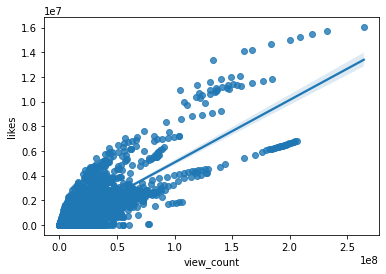

In [6]:
sb.regplot(x="view_count", y="likes", data=df)

In [6]:
print(df.describe)

<bound method NDFrame.describe of            video_id                                              title  \
0       3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1       M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2       J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3       kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4       VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   
...             ...                                                ...   
106986  OUYGtSE0a1U           P.O. Box unboxing and living room clean!   
106987  Yov854ZT1lg                                   Starlink Mission   
106988  OBziHxBmoHM                                 AMP SUMO WRESTLING   
106989  Qkj2_lqa3Ng  The TILTED TOWERS Update is HERE! (Dinosaurs, ...   
106990  1YyPPYePY9Q  NLE CHOPPA CAN REALLY HOOP! Basketball Session...   

                 publishedAt                 channelId   channelTitle  \
0   

In [7]:
print(df.iloc[:,0])

0         3C66w5Z0ixs
1         M9Pmf9AB4Mo
2         J78aPJ3VyNs
3         kXLn3HkpjaA
4         VIUo6yapDbc
             ...     
106986    OUYGtSE0a1U
106987    Yov854ZT1lg
106988    OBziHxBmoHM
106989    Qkj2_lqa3Ng
106990    1YyPPYePY9Q
Name: video_id, Length: 106991, dtype: object


In [10]:
print(df[['title','likes','dislikes']])

                                                    title   likes  dislikes
0                      I ASKED HER TO BE MY GIRLFRIEND...  156908      5855
1       Apex Legends | Stories from the Outlands – “Th...  146739      2794
2       I left youtube for a month and THIS is what ha...  353787      2628
3       XXL 2020 Freshman Class Revealed - Official An...   23251      1856
4       Ultimate DIY Home Movie Theater for The LaBran...   45802       964
...                                                   ...     ...       ...
106986           P.O. Box unboxing and living room clean!   26510         0
106987                                   Starlink Mission   21559         0
106988                                 AMP SUMO WRESTLING   99778         0
106989  The TILTED TOWERS Update is HERE! (Dinosaurs, ...   75290         0
106990  NLE CHOPPA CAN REALLY HOOP! Basketball Session...   29234         0

[106991 rows x 3 columns]


In [5]:
ndf=df[df["comment_count"]=="0"]
df.drop(ndf.index,axis=0,inplace=True)
print(df[['comment_count','view_count']])
print(ndf)

        comment_count  view_count
0               35313     1514614
1               16549     2381688
2               40221     2038853
3                7647      496771
4                2196     1123889
...               ...         ...
106986            788      363547
106987            872      499743
106988           5088     1397875
106989           3559     2485764
106990            772     1193496

[106991 rows x 2 columns]
Empty DataFrame
Columns: [video_id, title, publishedAt, channelId, channelTitle, categoryId, trending_date, tags, view_count, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, description]
Index: []


In [10]:
df["view_count"]=df["view_count"].astype('int')
binwidth=int((max(df["view_count"])-min(df["view_count"]))/3)
print(binwidth)
#we build the bin array, from min value to max value, using bin width calculated above.
bins=range(min(df["view_count"]),max(df["view_count"]),binwidth)
print(bins)
#we create labels for each bin: “Low”, “Medium” and “High”.
likes_groups=np.array(['low', 'medium', 'high'])
#we create a column similar to the one with the group price of a car.
df["likes"]=pd.cut(df["likes"],bins=bins, labels=likes_groups)
print(df[['likes','view_count']])
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["view_count"], bins = 3)
# set x/y labels and plot title
plt.pyplot.xlabel("View Count")
plt.pyplot.ylabel("Likes")
plt.pyplot.title("View Count to Likes")

88135796
range(0, 264407389, 88135796)
       likes  view_count
0        low     1514614
1        low     2381688
2        low     2038853
3        low      496771
4        low     1123889
...      ...         ...
106986   low      363547
106987   low      499743
106988   low     1397875
106989   low     2485764
106990   low     1193496

[106991 rows x 2 columns]


AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

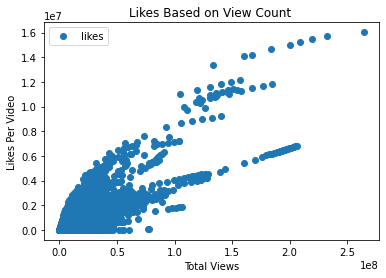

In [11]:
df.plot(x='view_count', y='likes', style='o')
plt.title('Likes Based on View Count ')
plt.xlabel('Total Views')
plt.ylabel('Likes Per Video')
plt.show()
#Plotting view count and likes

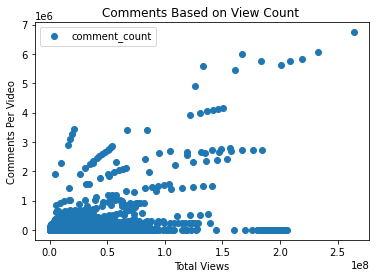

In [6]:
df.plot(x='view_count', y='comment_count', style='o')
plt.title('Comments Based on View Count ')
plt.xlabel('Total Views')
plt.ylabel('Comments Per Video')
plt.show()

In [8]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [6]:
col_names=['video_id', 'title','publishedAt','channelId','channelTitle','categoryId','trending_date','tags','view_count','likes','dislikes','comment_count','thumbnail_link','comments_disabled','ratings_disabled','description']
df = pd.read_csv("US_youtube_trending_data.csv", header=None, names=col_names)
#loading the dataset

C:\Users\ottoc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,8,9,10,11,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
export_graphviz 

<function sklearn.tree._export.export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)>

In [14]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
x = df[['likes', 'dislikes']]
y = df['view_count']
cdf=df[['likes','dislikes','view_count','comment_count']]
msk=np.random.rand(len(df)) < 0.8
train=cdf[msk]
test=cdf[~msk]
#Setting these to a variable

In [40]:
x=df.iloc[:, :-1].values
y=df.iloc[:, 1].values
#Setting up for training and testing sets

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Defining the training and testing set

In [17]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [18]:
#Getting the Intercept and Coefficients
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  585361.8778610555
Coefficients:


[('likes', 11.93520773229887), ('dislikes', 131.80892135737582)]

In [20]:
y_pred_mlr= mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 1412883.32676165  1187055.04985919 29600152.61589759 ...
  2186231.16191136   961011.75193589 10462588.97928416]


In [21]:
#Showing actual and predicted values
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
30611,617752,1.412883e+06
85761,571166,1.187055e+06
84589,11990780,2.960015e+07
83113,994296,1.397116e+06
74863,695348,7.667566e+05


In [22]:
#Getting the overall evaluation of the data
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 75.52
Mean Absolute Error: 1228016.848524706
Mean Square Error: 10311401686682.273
Root Mean Square Error: 3211137.1329611996


In [12]:
grouped_test2=df[['dislikes','view_count']].groupby(['view_count'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('dislikes')['view_count'], grouped_test2.get_group('comment_count')['view_count'], grouped_test2.get_group('dislikes')['view_count'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   

KeyError: 'dislikes'

TypeError: 'value' must be an instance of str or bytes, not a float

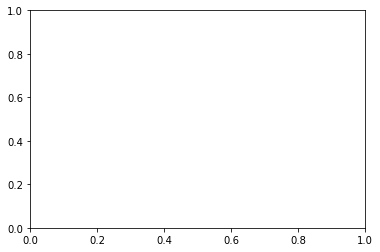

In [13]:
plt.bar(df["view_count"],df["likes"], align='center', alpha=0.5)
plt.ylabel('View Count')
plt.title('Like and Dislike')
plt.ion()
plt.show()

In [12]:
subset=df.sample(n=100)
subset.shape

(100, 16)

In [4]:
x=np.array=('likes','dislikes')
y=np.array=('view_count','comment_count')
kf = KFold(n_splits=2)
kf.get_n_splits(X)
print(kf)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

NameError: name 'X' is not defined

In [ ]:
#4/14: Use the new wordcloud to sort tags
#4/15: Have Report Near Finish
#4/20: Work On Poster
#4/26: Final Presentation, Poster, and Report